# Comparing Gradient Boosting Methods with Random Forest, Decision Tree, and Linear Regression

### Table of Contents
* [Comparing Gradient Boosting Methods with Random Forest, Decision Tree, and Linear Regression]()
    * [Numeric Method](#scrollTo=71zsw8rURVYh)
    * [Data Preprocessing and EDA](#scrollTo=l0CyjLDXRVYr)
        * [1.1. Learn the Data](#scrollTo=W1CnQQOiRVY8)
        * [1.2. Checking the Anomaly Value](#scrollTo=JGUXMHEbRVZP)
            * [1.2.1. Checking the other values in the model, vehicletype, and fueltype columns](#scrollTo=uWouTbf5RVZQ)
            * [1.2.2. Checking the Year column](#scrollTo=of103HbNTkoo)
            * [1.2.3. Convert anomaly value to NaN](#scrollTo=MBP4edYXRVZi)
        * [1.3. Checking for Duplicates and Missing Values](#scrollTo=uBEgvXuARVZm)
            * [1.3.1. Filling Missing Value in model Column](#scrollTo=WfzxXBvORVZ8)
            * [1.3.2. Filling Missing Value in power Column](#scrollTo=ar14rCYJRVaL)
            * [1.3.3. Filling Missing Value in vehicletype Column](#scrollTo=2wurceC7RVaa)
            * [1.3.4. Filling Missing Value in fueltype Column](#scrollTo=L50ihFBkRVai)
            * [1.3.5. Filling Missing Value in gearbox Column](#scrollTo=JieNJP0aRVao)
            * [1.3.6. Filling Missing Value in notrepaired Column](#scrollTo=tM6WZLZZRVas)
            * [1.3.7. Reapplying the previous Fillna Function](#scrollTo=muNUEVaJRVay)
        * [1.4. EDA](#scrollTo=s5b0CFCtRVa9)
            * [1.4.1. Plotting Continues Data](#scrollTo=6F_OWfEERVbC)
            * [1.4.2. Plotting Categorical Data](#scrollTo=S_xU92mbNKZv)
    * [Split Data](#scrollTo=9TdKzy9VW8wT)
        * [2.1. Train, Test Split](#scrollTo=zqqDrzXLNKZy)
        * [2.2. One-Hot Encoding](#scrollTo=mlm_b6JuNKZz)
        * [2.3. Ordinal Encoding](#scrollTo=vk1j92meNKZ2)
    * [Model Analysis](#scrollTo=gQEshNAvsoHf)
        * [3.1. Linear Regression (Sanity Check)](#scrollTo=lsl1AxJnsqXD)
        * [3.2. Random Forest](#scrollTo=_hDQHbdas0eR)
        * [3.3. XGBoost](#scrollTo=ymXj_AZ5NKZ9)
        * [3.4. LightGBM](#scrollTo=x7PcZyp1NKZ_)
        * [3.5. CatBoost](#scrollTo=_OUt1QRjNKaB)

>[Consclusions](#scrollTo=OFZ7UGSeNKaE)



## Numerical Method
 
Rusty Bargain is a used car buying and selling company developing an app to attract new buyers. In the app, we can find the market price of a car. We have access to historical data: specifications, version, and price of the vehicle. We need to build a model to determine its value. 

Goals:
- Prediction quality;
- Speed of the model in predicting;
- Time required to train the model

## 1. Data Preprocessing and EDA

In [ ]:
!pip install sidetable
!pip install missingno
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
# load all libraries
import pandas as pd
import numpy as np
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from collections import defaultdict
import warnings
warnings.simplefilter('ignore')
import missingno as msno

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

### 1.1. Learn the Data

In [ ]:
# load the data
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/moved_car_data.csv')

table = pd.DataFrame

Data description:

Features
- `DateCrawled` - the date when the profile was downloaded from the database
- `VehicleType` - vehicle body type
- `RegistrationYear` - vehicle registration year
- `Gearbox` - gearbox type
- `Power` - power (hp)
- `Model` - vehicle model
- `Mileage` - mileage (measured in km based on a specific regional dataset)
- `RegistrationMonth` - vehicle registration month
- `FuelType` - fuel type
- `Brand` - vehicle brand
- `NotRepaired` - whether the vehicle has been repaired before
- `DateCreated` - profile creation date
- `NumberOfPictures` - number of vehicle pictures
- `PostalCode` - postal code of the profile owner (user)
- `LastSeen` - date of last user activity

Target
- `Price` - price (in Euro)

In [ ]:
# display the sample of data
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [ ]:
# print the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [ ]:
# change column names to lowercase
df.columns = df.columns.str.lower()

In [ ]:
# display the statistical descriptive of the data
df.describe()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Findings: 
- The price column should not have the lowest value of 0. It means that the car has no price at all or is free.
- The numberofpictures column has no value at all and should be discarded.
- The power column also has the lowest value of 0, which means that a car cannot drive at all, besides the highest value for the engine power of a [super car](https://www.carwow.co.uk/blog/highest-horsepower-cars#:~:text=Some%20of%20the%20highest%20horsepower%20cars%20available%20are%3A&text=Bugatti%20Chiron%20SS%3A%201%2C600hp,Dodge%20Demon%3A%20840hp) is currently 1,600 hp, making 20,000 hp an impossibility.

In [ ]:
# print the data dimensions
df.shape

(354369, 16)

### 1.2. Checking the Anomaly Value

**Checks for a value of 0 in the `power` column**

In [ ]:
# checking value of `power` column 
pd.DataFrame(df['power'].value_counts().reset_index()).head(10)

,index,power
0,0,40225
1,75,24023
2,60,15897
3,150,14590
4,101,13298
5,140,12852
6,90,12734
7,116,11918
8,105,10355
9,170,10121


#### 1.2.1. Checking the other values in the `model`, `vehicletype`, and `fueltype` columns

In [ ]:
# checking value of `vehicletype` column 
df.loc[df.loc[:, 'vehicletype'] == 'other'].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
36,11/03/2016 11:50,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,11/03/2016 00:00,0,2943,07/04/2016 03:46
38,01/04/2016 17:45,11900,other,2002,manual,129,other,150000,11,gasoline,volkswagen,no,01/04/2016 00:00,0,10551,05/04/2016 12:47
76,11/03/2016 14:50,1400,other,2003,manual,82,vito,150000,8,gasoline,mercedes_benz,no,11/03/2016 00:00,0,4668,11/03/2016 14:50
191,03/04/2016 11:44,550,other,1997,manual,75,golf,150000,6,petrol,volkswagen,no,03/04/2016 00:00,0,96175,07/04/2016 12:45
412,26/03/2016 21:49,13950,other,2011,manual,140,NaN,60000,11,gasoline,alfa_romeo,no,26/03/2016 00:00,0,86830,06/04/2016 14:15


In [ ]:
# checking value of `model` column 
df.loc[df.loc[:, 'model'] == 'other'].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
24,13/03/2016 20:40,500,sedan,1990,manual,118,other,150000,10,petrol,mercedes_benz,yes,13/03/2016 00:00,0,35390,13/03/2016 20:40
38,01/04/2016 17:45,11900,other,2002,manual,129,other,150000,11,gasoline,volkswagen,no,01/04/2016 00:00,0,10551,05/04/2016 12:47
39,25/03/2016 15:50,1500,bus,1984,manual,70,other,150000,8,gasoline,mercedes_benz,no,25/03/2016 00:00,0,22767,27/03/2016 03:17
52,04/04/2016 10:57,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,NaN,04/04/2016 00:00,0,34454,06/04/2016 12:45


In [ ]:
# checking value of `fueltype` column 
df.loc[df.loc[:, 'fueltype'] == 'other'].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
363,14/03/2016 23:52,6500,sedan,2007,manual,125,focus,125000,9,other,ford,no,14/03/2016 00:00,0,97199,05/04/2016 11:51
392,25/03/2016 18:56,2350,NaN,2006,NaN,0,c1,5000,0,other,citroen,NaN,25/03/2016 00:00,0,26123,07/04/2016 00:46
1565,22/03/2016 13:51,850,other,2001,NaN,0,other,150000,0,other,citroen,NaN,22/03/2016 00:00,0,23829,28/03/2016 03:47
4527,27/03/2016 09:54,0,other,2003,NaN,0,other,150000,1,other,kia,NaN,27/03/2016 00:00,0,26131,27/03/2016 10:48
6629,02/04/2016 13:47,0,small,1910,NaN,0,NaN,5000,1,other,sonstige_autos,NaN,02/04/2016 00:00,0,93105,04/04/2016 11:16


#### 1.2.2. Checking the Year column

In [ ]:
# checking years column
df.loc[df.loc[:,'registrationyear'] > 2030].head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
12946,29/03/2016 18:39,49,NaN,5000,NaN,0,golf,5000,12,NaN,volkswagen,NaN,29/03/2016 00:00,0,74523,06/04/2016 04:16
15147,14/03/2016 00:52,0,NaN,9999,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,13/03/2016 00:00,0,32689,21/03/2016 23:46
15870,02/04/2016 11:55,1700,NaN,3200,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN,02/04/2016 00:00,0,33649,06/04/2016 09:46
17271,23/03/2016 16:43,700,NaN,9999,NaN,0,other,10000,0,NaN,opel,NaN,23/03/2016 00:00,0,21769,05/04/2016 20:16
17346,06/03/2016 16:06,6500,NaN,8888,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,06/03/2016 00:00,0,55262,30/03/2016 20:46


Findings:
- All column types in the data are defined as objects or integers; in other words, there are no columns containing data with float data types.
- Besides missing values, several other problems occur in the data:
    - The column `numberofpictures` contains no data and only the value 0. We can delete the queue.
    - There is a value of 0 in the `power` column, which contains how fast the car engine can work. We can say that a value of 0 is the same as a missing value. 
    - Some cars have other values in the `model`, `vehicletype`, and `fueltype` columns. These values are also the same as missing values.
    
Next step:
- We will change the value 0 in the `power` column to the value `NaN`.
- We will also change the other values in the `model`, `vehicletype` and `fueltype` columns to `NaN` values.
- Then, we will apply some engineering to fill these values.
- Removing unnatural years.

#### 1.2.3. Convert anomaly value to NaN

In [ ]:
# converts and delete anomaly values
df.loc[df['power'] == 0, 'power'] = np.nan
df.loc[df['power'] > 1200, 'power'] = np.nan # power column
df.loc[df['model'] == 'other', 'model'] = np.nan # model column
df.loc[df['vehicletype'] == 'other', 'vehicletype'] = np.nan # vehivcletype column
df.loc[df['fueltype'] == 'other', 'fueltype'] = np.nan # fueltype column
df.drop(df.loc[df.loc[:,'registrationyear'] > 2020].index, inplace=True) # year column

# checking value of `power` column 
df['power'].value_counts(dropna=False).head(10)

NaN      40401
75.0     24020
60.0     15897
150.0    14590
101.0    13298
140.0    12852
90.0     12734
116.0    11918
105.0    10355
170.0    10120
Name: power, dtype: int64

### 1.3. Checking for Duplicates and Missing Values

In [ ]:
# checking duplicates
df.duplicated().sum()

263

In [ ]:
# print the duplicated data (first)
df[df.duplicated()].head(2)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
14266,21/03/2016 19:06,5999,small,2009,manual,80.0,polo,125000,5,petrol,volkswagen,no,21/03/2016 00:00,0,65529,05/04/2016 20:47
27568,23/03/2016 10:38,12200,bus,2011,manual,125.0,zafira,40000,10,gasoline,opel,no,23/03/2016 00:00,0,26629,05/04/2016 07:44


In [ ]:
# print the duplicated data (last)
df[df.duplicated(keep='last')].head(2)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
183,21/03/2016 19:06,5999,small,2009,manual,80.0,polo,125000,5,petrol,volkswagen,no,21/03/2016 00:00,0,65529,05/04/2016 20:47
1771,06/04/2016 21:25,3900,sedan,1999,manual,116.0,beetle,150000,6,petrol,volkswagen,no,06/04/2016 00:00,0,55469,06/04/2016 21:25


In [ ]:
# remove the duplicates data
df.drop_duplicates(inplace=True), df.reset_index(drop=True)

# print the data dimensions
df.shape

(354001, 16)

In [ ]:
# check the duplicates one more time
df.duplicated().sum()

0

In [ ]:
# checking missing values
df.stb.missing().reset_index()

,index,missing,total,percent
0,notrepaired,71054,354001,20.071695
1,model,44046,354001,12.442338
2,vehicletype,40665,354001,11.487256
3,power,40394,354001,11.410702
4,fueltype,33016,354001,9.326527
5,gearbox,19749,354001,5.578798
6,datecrawled,0,354001,0.000000
7,price,0,354001,0.000000
8,registrationyear,0,354001,0.000000
9,mileage,0,354001,0.000000


In [ ]:
# print the columns contain missing value
col_missing = df.columns[df.isnull().any()]

df[col_missing].head(10)

,vehicletype,gearbox,power,model,fueltype,notrepaired
0,NaN,manual,NaN,golf,petrol,NaN
1,coupe,manual,190.0,NaN,gasoline,yes
2,suv,auto,163.0,grand,gasoline,NaN
3,small,manual,75.0,golf,petrol,no
4,small,manual,69.0,fabia,gasoline,no
5,sedan,manual,102.0,3er,petrol,yes
6,convertible,manual,109.0,2_reihe,petrol,no
7,sedan,manual,50.0,NaN,petrol,no
8,bus,manual,125.0,c_max,petrol,NaN
9,small,manual,101.0,golf,NaN,NaN


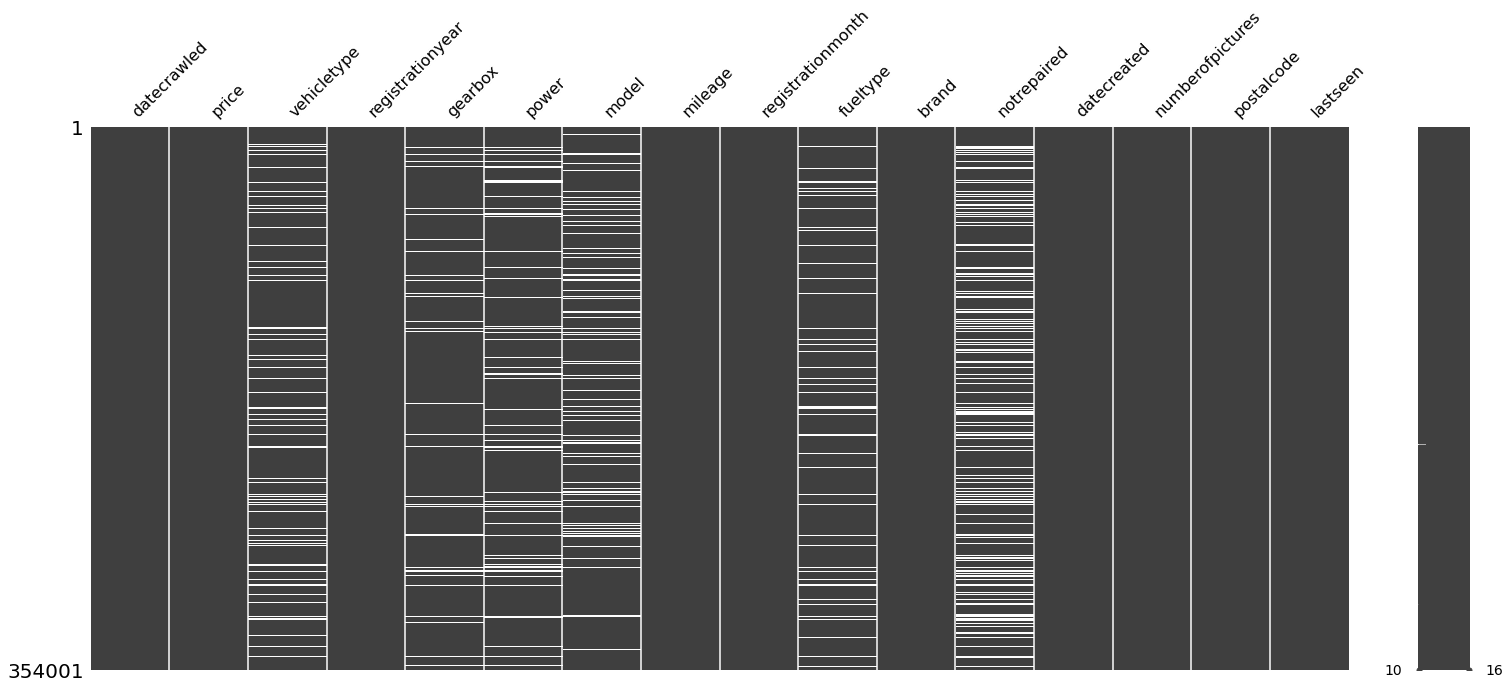

In [ ]:
# display the matrix plot of missing value
msno.matrix(df)
plt.show()

The distribution of missing values occurs randomly or does not form a pattern, making it challenging to find the cause of the missing values. 

Most missing values occur in columns containing categorical data. It is pretty challenging to find a pattern to overcome the missing values:
- We can know the fuel and transmission types if we know the model or type of the car.
- We can know the type of car by matching the brand and model of the car.
- We can determine the vehicle model by combining the vehicle type, brand, model, and registration year.
- But what about the `notrepaired` column? Maybe we can only fill it with the value `unknown`.  

#### 1.3.1. Filling Missing Value in `model` Column

In [ ]:
# calculate the missing values of model column
df.loc[:, 'model'].isna().sum()

44046

In [ ]:
# categorize model values based on brand, year, and power column
df.groupby(['brand', 'registrationyear', 'power', 'gearbox', 'fueltype', 'model'])[['datecreated']].agg('count')

datecreated
brand      registrationyear power gearbox fueltype model               
alfa_romeo 1972             131.0 manual  petrol   spider             2
           1974             87.0  manual  petrol   spider             1
           1977             87.0  manual  petrol   spider             1
                            126.0 manual  petrol   spider             1
                            128.0 manual  petrol   spider             1
...                                                                 ...
volvo      2018             109.0 manual  gasoline c_reihe            1
                                          petrol   v40                1
                            115.0 manual  petrol   v40                1
                            136.0 manual  gasoline v50                1
                            163.0 manual  gasoline v70                1

[39374 rows x 1 columns]

- We can fill in the missing values in the model column of a car by grouping by brand, year, power, transmission, and fuel type.

In [ ]:
%%time

# fill the missing value of vehicletype model
df.loc[df.model.isna(), 'model'] = df.groupby(['brand', 'registrationyear', 'power', 'gearbox', 'fueltype'])['model'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of model column
df.loc[:, 'model'].isna().sum()

CPU times: user 27.7 s, sys: 549 ms, total: 28.3 s
Wall time: 39 s


29259

In [ ]:
%%time

# fill the missing value of vehicletype model
df.loc[df.model.isna(), 'model'] = df.groupby(['brand', 'registrationyear', 'power'])['model'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of model column
df.loc[:, 'model'].isna().sum()

CPU times: user 16.7 s, sys: 744 ms, total: 17.5 s
Wall time: 16.3 s


23309

Findings:
- We can only fill in half of the missing values. We cannot generalize the model more since it is the most specific data to determine the price of the vehicle.
- We cannot further specify a car model just by knowing the brand and release year of the car. 

#### 1.3.2. Filling Missing Value in `power` Column

In [ ]:
# calculate the missing values of power column
df.loc[:, 'power'].isna().sum()

40394

In [ ]:
# categorize power values based on model and registrationyear column
df.groupby(['model', 'registrationyear', 'gearbox', 'power'])[['datecreated']].count()

datecreated
model  registrationyear gearbox power             
100    1970             auto    100.0            1
       1972             manual  112.0            1
                                116.0            3
       1973             manual  86.0             1
                                101.0            2
...                                            ...
zafira 2018             manual  130.0            1
                                140.0            2
                                147.0            2
                                150.0            3
                                192.0            1

[37911 rows x 1 columns]

- We will restore the missing values in the power column by equalizing the vehicle specifications based on model, year, and transmission type.
- From the data above, we can see that a car generally has the same amount of power if we group it by model and engine power.

In [ ]:
%%time

# fill the missing value of power column
df.loc[:, 'power'] = df.loc[:, 'power'].fillna(df.groupby(['model', 'registrationyear', 'gearbox'])['power'].transform('median'))

# calculate the missing values of gearbox column
df.loc[:, 'power'].isna().sum()

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 105 ms


18800

In [ ]:
%%time

# fill the missing value of power column
df.loc[:, 'power'] = df.loc[:, 'power'].fillna(df.groupby(['model', 'registrationyear'])['power'].transform('median'))

# calculate the missing values of gearbox column
df.loc[:, 'power'].isna().sum()

CPU times: user 66.4 ms, sys: 0 ns, total: 66.4 ms
Wall time: 67.1 ms


9829

#### 1.3.3. Filling Missing Value in `vehicletype` Column

In [ ]:
# calculate the missing values of vehicletype column
df.loc[:, 'vehicletype'].isna().sum()

40665

In [ ]:
# categorize vehicletype values based on model and registrationyear column
df.groupby(['model', 'registrationyear', 'vehicletype'])[['datecreated']].count()

datecreated
model  registrationyear vehicletype             
100    1910             sedan                  1
       1970             sedan                  1
       1972             sedan                  4
       1973             sedan                  3
       1974             sedan                  1
...                                          ...
zafira 2014             bus                   10
                        convertible            1
                        suv                    3
       2015             bus                    3
                        suv                    1

[10402 rows x 1 columns]

- Of course, we can fill in the missing values in the vehicle type column by knowing the model of the vehicle. Because it is clear that the model is a car series issued by a company to give uniqueness, especially the type of product they release.

In [ ]:
%%time

# fill the missing value of vehicletype column
df.loc[df.vehicletype.isna(), 'vehicletype'] = df.groupby(['model', 'registrationyear'])['vehicletype'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of vehicletype column
df.loc[:, 'vehicletype'].isna().sum()

CPU times: user 2.92 s, sys: 94.7 ms, total: 3.01 s
Wall time: 2.87 s


19677

In [ ]:
%%time

# fill the missing value of vehicletype column
df.loc[df.vehicletype.isna(), 'vehicletype'] = df.groupby(['model'])['vehicletype'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of vehicletype column
df.loc[:, 'vehicletype'].isna().sum()

CPU times: user 383 ms, sys: 5.02 ms, total: 388 ms
Wall time: 379 ms


6461

#### 1.3.4. Filling Missing Value in `fueltype` Column

In [ ]:
# calculate the missing values of fueltype column
df.loc[:, 'fueltype'].isna().sum()

33016

In [ ]:
# categorize fueltype column values based on model, year, and power column
df.groupby(['model', 'registrationyear', 'power', 'fueltype'])[['datecreated']].count()

datecreated
model  registrationyear power fueltype             
100    1972             112.0 petrol              1
                        116.0 petrol              3
       1973             86.0  petrol              1
                        101.0 petrol              2
       1974             112.0 petrol              1
...                                             ...
zafira 2018             125.0 petrol              6
                        130.0 gasoline            1
                        140.0 petrol              1
                        147.0 petrol              2
                        150.0 petrol              1

[36572 rows x 1 columns]

- Based on the model, type, and power of a car, the type of fuel used is similar, so we can fill in the missing values by equating these characteristics to restore the value in the fuel type column.

In [ ]:
%%time

# fill the missing value of vehicletype model
df.loc[df.fueltype.isna(), 'fueltype'] = df.groupby(['model', 'registrationyear', 'power'])['fueltype'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of model column
df.loc[:, 'fueltype'].isna().sum()

CPU times: user 20.1 s, sys: 684 ms, total: 20.8 s
Wall time: 19.7 s


8254

In [ ]:
%%time

# fill the missing value of vehicletype model
df.loc[df.fueltype.isna(), 'fueltype'] = df.groupby(['model', 'registrationyear'])['fueltype'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of model column
df.loc[:, 'fueltype'].isna().sum()

CPU times: user 3.1 s, sys: 133 ms, total: 3.24 s
Wall time: 3 s


5942

#### 1.3.5. Filling Missing Value in `gearbox` Column

In [ ]:
# calculate the missing values of gearbox column
df.loc[:, 'gearbox'].isna().sum()

19749

In [ ]:
# categorize gearbox column values based on model, year, and power column
df.groupby(['model', 'registrationyear', 'power', 'gearbox'])[['datecreated']].count()

datecreated
model  registrationyear power gearbox             
100    1970             100.0 auto               1
       1972             112.0 manual             1
                        116.0 manual             3
       1973             86.0  manual             1
                        101.0 manual             2
...                                            ...
zafira 2018             140.0 manual             2
                        147.0 manual             2
                        150.0 auto               1
                              manual             3
                        192.0 manual             1

[38336 rows x 1 columns]

- From the data above we can determine the type of transmission of a car by equating the model, year, and amount of power of a car.

In [ ]:
# fill the missing value of vehicletype model
df.loc[df.gearbox.isna(), 'gearbox'] = df.groupby(['model', 'registrationyear', 'power'])['gearbox'].apply(lambda x: x.ffill().bfill())

# calculate the missing values of model column
df.loc[:, 'gearbox'].isna().sum()

5488

#### 1.3.6. Filling Missing Value in `notrepaired` Column

In [ ]:
# fill the missing value of notrepaired model
df.loc[:, 'notrepaired'] = df.loc[:, 'notrepaired'].fillna('unknown')

# calculate the missing values of notrepaired column
pd.DataFrame(df.loc[:, 'notrepaired'].value_counts())

,notrepaired
no,246916
unknown,71054
yes,36031


- We can only fill the notrepaired column with unknown for the missing values in that column.

#### 1.3.7. Reapplying the previous Fillna Function

In [ ]:
# double-check the number of missing values
col_missing = df.columns[df.isnull().any()]

df[col_missing].stb.missing(style=True)

,missing,total,percent
model,"23,309","354,001",6.58%
power,"9,829","354,001",2.78%
vehicletype,"6,461","354,001",1.83%
fueltype,"5,942","354,001",1.68%
gearbox,"5,488","354,001",1.55%


In [ ]:
%%time

# reapply the fillna function

# model
df.loc[df.model.isna(), 'model'] = df.groupby(['brand', 'registrationyear', 'power'])['model'].apply(lambda x: x.ffill().bfill())

# power
df.loc[:, 'power'] = df.loc[:, 'power'].fillna(df.groupby(['model', 'registrationyear', 'gearbox'])['power'].transform('median'))

# vehicletype
df.loc[df.vehicletype.isna(), 'vehicletype'] = df.groupby(['model', 'registrationyear'])['vehicletype'].apply(lambda x: x.ffill().bfill())

# fueltype
df.loc[df.fueltype.isna(), 'fueltype'] = df.groupby(['model', 'registrationyear', 'power'])['fueltype'].apply(lambda x: x.ffill().bfill())

# gearbox
df.loc[df.gearbox.isna(), 'gearbox'] = df.groupby(['model', 'registrationyear', 'power'])['gearbox'].apply(lambda x: x.ffill().bfill())

CPU times: user 1min 1s, sys: 2.29 s, total: 1min 3s
Wall time: 1min 1s


In [ ]:
# recheck the number of missing values
df[col_missing].stb.missing(style=True)

,missing,total,percent
model,"23,287","354,001",6.58%
power,"9,829","354,001",2.78%
vehicletype,"6,450","354,001",1.82%
fueltype,"5,933","354,001",1.68%
gearbox,"5,487","354,001",1.55%


In [ ]:
# calculate missing value ratio
df[df.isna().any(axis=1)].shape[0] / df.shape[0] * 100

6.899980508529636

The number of missing values is less than 10% of the total data, so we decide to drop the data.

In [ ]:
# drop missing value
df.dropna(inplace=True)

# dimension data
df.shape

(329575, 16)

### 1.4. EDA

In [ ]:
# print clean data sample
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,sedan,1993,manual,75.0,golf,150000,0,petrol,volkswagen,unknown,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,unknown,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


#### 1.4.1. Plotting Continues Data

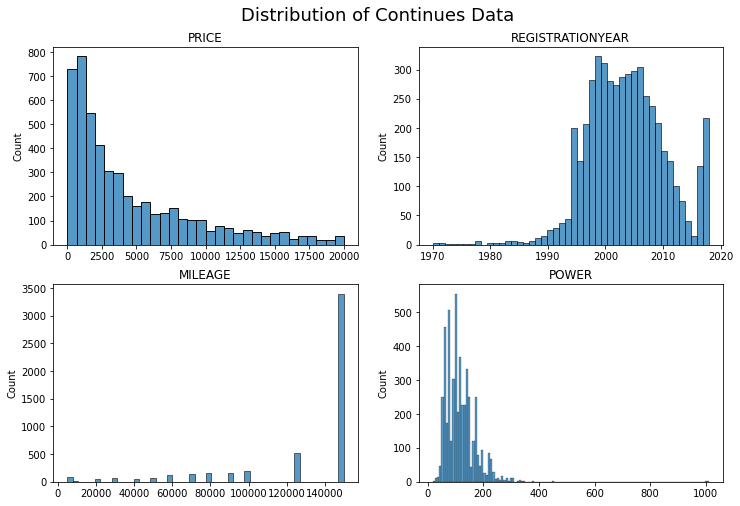

In [ ]:
# display the distribution of continues columns
continues = ['price', 'registrationyear', 'mileage', 'power']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of Continues Data', fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 2
# calculate number of rows
nrows = len(continues) // ncols + (len(continues) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, cont in enumerate(continues):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(data=df, x=df[cont].sample(5000), ax=ax)

    # chart formatting
    ax.set_title(cont.upper())
    ax.set_xlabel('')

plt.show()

Findings:
- Is price 0 a fair value for a car? If so, most of the cars we sell start from a price of 0.
- Most cars we advertise have a mileage of over 140,000 miles.
- Most of the cars posted on the app were registered between 1990 and 2016.
- The majority of cars have an engine power rating below 400 hp.

#### 1.4.2. Plotting Categorical Data

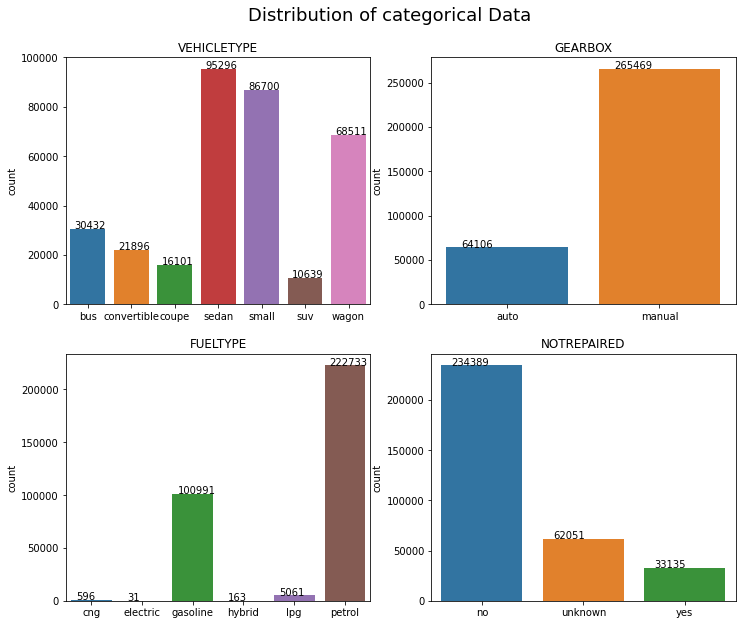

In [ ]:
# display the distribution of categorical columns
categorical = ['vehicletype', 'gearbox', 'fueltype', 'notrepaired']

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of categorical Data', fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 2
# calculate number of rows
nrows = len(categorical) // ncols + (len(categorical) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, cat in enumerate(categorical):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    splot = sns.countplot(data=df, x=df[cat].sort_values(), ax=ax)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
    # chart formatting
    ax.set_title(cat.upper())
    ax.set_xlabel('')

plt.show()

Findings:
- The most popular car types are sedan, small, and wagon. Most consumers prefer a compact car type for use or an urban type.
- Almost all cars run on petrol and gasoline.
- The majority of cars have never been repaired before.
- Most cars have manual transmissions, four times more than automatic transmissions.

## 2. Split Data

### 2.1. Train, Test Split

In [ ]:
# drop unnecessary columns
df.drop(['datecrawled', 'registrationmonth', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], axis=1, inplace=True)

# print df columns
df.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'mileage', 'fueltype', 'brand', 'notrepaired'],
      dtype='object')

In [ ]:
# defines features and targets
X = df.drop('price', axis=1)
y = df.loc[:, 'price']

### 2.2. One-Hot Encoding

In [ ]:
# create one hot encoding features
X_dummies = pd.get_dummies(X, drop_first=True)

# print the X_dummies sample
X_dummies.head()

,registrationyear,power,mileage,vehicletype_convertible,vehicletype_coupe,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_wagon,gearbox_manual,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_unknown,notrepaired_yes
0,1993,75.0,150000,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,2011,190.0,125000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2004,163.0,125000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2001,75.0,150000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2008,69.0,90000,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# split data to train and test
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_dummies, y, random_state=42, test_size=0.3)

features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
# print features train sample
features_train.head()

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
94167,convertible,2004,manual,125.0,tigra,150000,petrol,opel,no
160134,sedan,1998,manual,75.0,lupo,125000,petrol,volkswagen,unknown
19507,sedan,1997,auto,193.0,a6,150000,petrol,audi,no
244934,small,1996,manual,60.0,polo,150000,petrol,volkswagen,unknown
141186,suv,2013,manual,122.0,yeti,20000,petrol,skoda,no


### 2.3. Ordinal Encoding

In [ ]:
# define categorical columns
X_cat = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']

In [ ]:
# create ordinal encoder for lightgbm 
X_train_enc = features_train.copy()
X_test_enc = features_test.copy()

# apply the model
X_train_enc[X_cat] = OrdinalEncoder().fit_transform(X_train_enc[X_cat])
X_test_enc[X_cat] = OrdinalEncoder().fit_transform(X_test_enc[X_cat])

In [ ]:
# print the X_train_enc sample
X_train_enc.head()

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
94167,1.0,2004,1.0,125.0,216.0,150000,5.0,24.0,0.0
160134,3.0,1998,1.0,75.0,143.0,125000,5.0,37.0,1.0
19507,3.0,1997,0.0,193.0,31.0,150000,5.0,1.0,0.0
244934,4.0,1996,1.0,60.0,172.0,150000,5.0,37.0,1.0
141186,5.0,2013,1.0,122.0,244.0,20000,5.0,31.0,0.0


## 3. Model Analysis

We will create several models to predict the price of cars, considering that the objective of this project is not only focused on the results of a model but also the time to train the model is also an important variable that needs to be considered. So, we will only set a few parameters that influence a model the most.

### 3.1. Linear Regression (Sanity Check)

We don't need to set any parameters on the Linear Regression model because we only use this model as the baseline of the model that we will create next.

In [ ]:
# training the algorithm
lin_reg = LinearRegression()  
lin_reg.fit(X_train_ohe, y_train_ohe)

# linear regression model predict
y_pred_train_lr = lin_reg.predict(X_train_ohe)
y_pred_test_lr = lin_reg.predict(X_test_ohe)

In [ ]:
# evaluation metric results
print(' Root Mean Squared Error Train:', sqrt(mean_squared_error(y_train_ohe, y_pred_train_lr)))
print(' Root Mean Squared Error Test:', sqrt(mean_squared_error(y_test_ohe, y_pred_test_lr)))

 Root Mean Squared Error Train: 2391.8895919458246
 Root Mean Squared Error Test: 2424.040341544464


### 3.2. Random Forest


In the Random Forest model, we need categorical data in the form of OHE so that the results obtained are more optimal than using an ordinal encoder.

In [ ]:
%%time

# rmse score rf model training and test set 
print('Random Forest Model')
rf_result = defaultdict(list)

for n in range(1,11):
    ran_for = RandomForestRegressor(random_state=42, max_depth=n, n_estimators=10)
    ran_for.fit(X_train_ohe.to_numpy(), y_train_ohe.to_numpy())
    
    y_pred_train_rf = ran_for.predict(X_train_ohe.to_numpy())
    y_pred_test_rf = ran_for.predict(X_test_ohe.to_numpy())
    
    rf_result['max_depth'].append(n)
    rf_result['train_rmse'].append(sqrt(mean_squared_error(y_train_ohe.to_numpy(), y_pred_train_rf)))
    rf_result['test_rmse'].append(sqrt(mean_squared_error(y_test_ohe.to_numpy(), y_pred_test_rf)))
    
display(pd.DataFrame(rf_result))

Random Forest Model


,max_depth,train_rmse,test_rmse
0,1,3740.390454,3714.626565
1,2,3262.919527,3255.681536
2,3,2948.103321,2944.139831
3,4,2650.667723,2649.681198
4,5,2429.103388,2428.868837
5,6,2287.771133,2291.767969
6,7,2166.818371,2175.433610
7,8,2071.181665,2094.573020
8,9,1982.894316,2024.392567
9,10,1898.040750,1965.819417


CPU times: user 2min 20s, sys: 2.62 s, total: 2min 23s
Wall time: 2min 23s


### 3.3. XGBoost

XGBoost model requires categorical data in the form of OHE, we will set the objective parameter to reg:squarederror.

In [ ]:
%%time

# rmse score xgboost model training and test set 
print('XGBoost Model')
xgb_result = defaultdict(list)

for n in range(1,6):
    xgbr = xgb.XGBRegressor(objective='reg:squarederror', max_depth=n)
    xgbr.fit(X_train_ohe.to_numpy(), y_train_ohe.to_numpy())
    
    y_pred_train_xg = xgbr.predict(X_train_ohe.to_numpy())
    y_pred_test_xg = xgbr.predict(X_test_ohe.to_numpy())
    
    xgb_result['max_depth'].append(n)
    xgb_result['train_rmse'].append(sqrt(mean_squared_error(y_train_ohe.to_numpy(), y_pred_train_xg)))
    xgb_result['test_rmse'].append(sqrt(mean_squared_error(y_test_ohe.to_numpy(), y_pred_test_xg)))
    
display(pd.DataFrame(xgb_result))

XGBoost Model


,max_depth,train_rmse,test_rmse
0,1,1880.171402,1872.857955
1,2,1692.085587,1687.110772
2,3,1589.380520,1595.763086
3,4,1535.162511,1550.593024
4,5,1472.822700,1504.604674


CPU times: user 17min 31s, sys: 3.25 s, total: 17min 34s
Wall time: 17min 35s


### 3.4. LightGBM

In the LightGBM model we need the categorical features to be converted into ordinal encoder form, as well as setting the categorical feature parameters in the fit model.

In [ ]:
%%time

# rmse score lightgbm model training and test set 
print('LightGBM Model')
lgb_result = defaultdict(list)

for n in [10, 20, 30, 50, 70, 100]:
    lgb = lgbm.LGBMRegressor(objective='rmse', num_leaves=n, max_depth=5)
    lgb.fit(X_train_enc, target_train, categorical_feature=X_cat)
    
    y_pred_train_lgb = lgb.predict(X_train_enc)
    y_pred_test_lgb = lgb.predict(X_test_enc)
    
    lgb_result['depth'].append(n)
    lgb_result['train_rmse'].append(sqrt(mean_squared_error(target_train, y_pred_train_lgb)))
    lgb_result['test_rmse'].append(sqrt(mean_squared_error(target_test, y_pred_test_lgb)))
    
display(pd.DataFrame(lgb_result))

LightGBM Model


,depth,train_rmse,test_rmse
0,10,1522.532625,1638.271118
1,20,1474.446000,1608.455557
2,30,1456.887293,1610.415299
3,50,1458.255416,1609.421616
4,70,1458.255416,1609.421616
5,100,1458.255416,1609.421616


CPU times: user 39.8 s, sys: 72.4 ms, total: 39.8 s
Wall time: 40 s


### 3.5. CatBoost

In the CatBoost model, we don't even need to convert categorical features into ordinal encode. We only need to set the categorical features parameter in the model fit function.

In [ ]:
%%time

# rmse score catboost model training and test set 
print('CatBoost Model')
cbr_result = defaultdict(list)

for n in range(1, 11):
    cbr = cb.CatBoostRegressor(loss_function='RMSE', depth=n, iterations=150, random_seed=42)
    cbr.fit(features_train, target_train, cat_features=X_cat, verbose=False)
    
    y_pred_train_lgb = cbr.predict(features_train)
    y_pred_test_lgb = cbr.predict(features_test)
    
    cbr_result['depth'].append(n)
    cbr_result['train_rmse'].append(sqrt(mean_squared_error(target_train, y_pred_train_lgb)))
    cbr_result['test_rmse'].append(sqrt(mean_squared_error(target_test, y_pred_test_lgb)))
    
display(pd.DataFrame(cbr_result))

CatBoost Model


,depth,train_rmse,test_rmse
0,1,1830.298348,1828.728940
1,2,1616.454600,1613.264035
2,3,1558.314436,1560.429908
3,4,1516.458226,1523.456609
4,5,1484.340270,1498.770016
5,6,1448.857196,1475.791823
6,7,1420.356686,1462.474096
7,8,1391.530579,1450.428575
8,9,1355.395301,1436.343278
9,10,1321.775361,1436.527709


CPU times: user 4min 7s, sys: 590 ms, total: 4min 7s
Wall time: 4min 8s


Findings:
- In the Random Forest model, the time needed to train the model is relatively short by setting the depth parameter at 10 levels. The best results of this model are improved by about 33% from the baseline model by setting the max_depth = 10 parameter.
- The XGBoost model takes the longest time to train the training data even though we only set the depth parameter at five levels. The results obtained are also slightly better than the Random Forest model.
- The LightGBM model has the shortest training time compared to the previous models. Although the results are not better than XGBoost, we can still set some parameters to optimize the results considering the short training time.
- The CatBoost model is the model with the best results. Although it takes a bit longer, still in the excellent category because training a model with depth parameters below up to 10 levels takes about 4 minutes, this model is the most balanced among all existing models.

## Consclusions

**1. Data Preparation**
- Our data contains a collection of specifications and prices of a car.
- Quite a lot of missing values were found in around 20% of the data.
- Some columns have abnormal values, such as the power and year columns.

**2. EDA and Data Visualization**
- Most of the cars we sell start from a price of 0.
- The majority of cars we advertise have mileage above 140,000 miles.
- Most of the cars posted on the app have registration years between 1990 and 2016.
- The majority of cars have an engine power rating below 400 hp.
- The most popular car types are sedan, small, and wagon. Most consumers prefer a compact car type for use or an urban type.
- Almost all cars are fueled by petrol and gasoline.
- The majority of cars have never been repaired before.
- Most cars have manual transmissions, four times more than automatic transmissions.


**3. Train, Test Split**
- We split the data into two groups of train set and test set with a ratio of 70:30 because the available data is quite large.
- We create OHE features because models such as Linear Regression, Random Forest, and XGBoost require categorical data in OHE form.
- We also do Ordinal Encoding conversion on categorical data for the LightGBM model, while the CatBoost model can read data in object form.

**4. Model Analysis**
- In the Random Forest model, the time needed to train the model is relatively short by setting the depth parameter of 10 levels. The best result of this model increases by about 33% from the baseline model by setting the max_depth = 10.
- The XGBoost model takes the longest to train the train data even though we only set the depth parameter at five levels. The results obtained are also slightly better than the Random Forest model.
- The LightGBM model has the shortest training time than some previous models. Although the results are not better than XGBoost, we can still set some parameters to optimize the results considering the short training time.
- The CatBoost model is the model with the best results. Although it takes a little longer, it is still in the excellent category because training a model with depth parameters below up to 10 levels takes about 4 minutes. This model is the most balanced among all existing models.


**Main Conclusion**
- We get the best model in this project in the CatBoos model, the model takes little time to train the model, and the results obtained also have the slightest error among all models. In addition, this model also does not require categorical data to be converted into numerical form or dummies.
